# Student Performance Prediction with Multiple Linear Regression

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
data = pd.read_csv("C:/Users/ikry/OneDrive/Desktop/MSc DS/PROJECTS/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
# Describing some of the stats of the data
data.describe() 

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Visualizing data

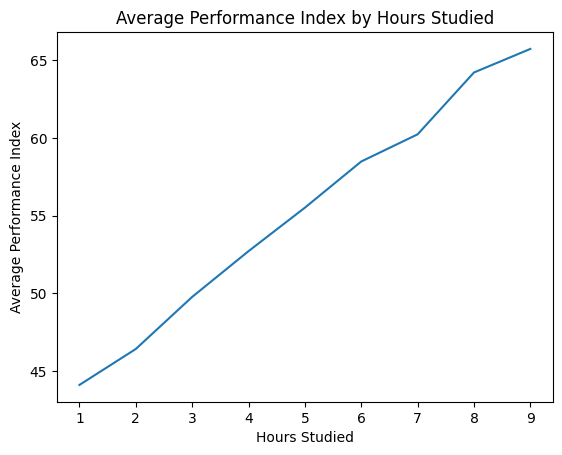

In [12]:
# Average performance index across different levels of the "Hours Studied" variable
avg_performance_by_hour = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hour.index, avg_performance_by_hour.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()


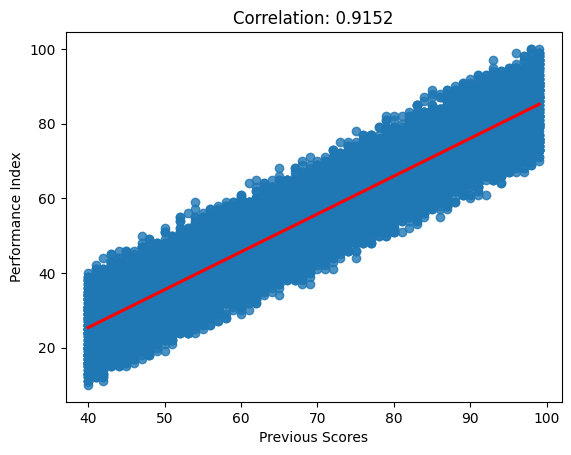

In [17]:

sns.regplot(data, x = "Previous Scores", y = 'Performance Index', line_kws = {'color':'red'})
plt.title(f"Correlation: {data['Previous Scores'].corr(data['Performance Index']):.4f}")
plt.show()

C:\Users\ikry\AppData\Local\Temp\ipykernel_9148\3604050168.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\ikry\AppData\Local\Temp\ipykernel_9148\3604050168.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\ikry\AppData\Local\Temp\ipykernel_9148\3604050168.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\ikry\AppData\Local\Temp\ipykernel_9148\3604050168.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


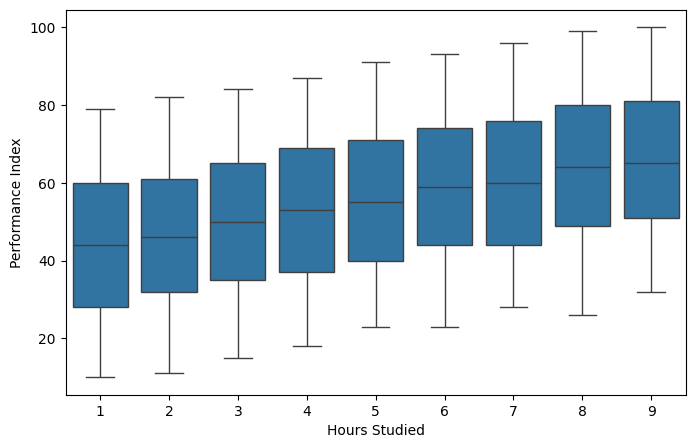

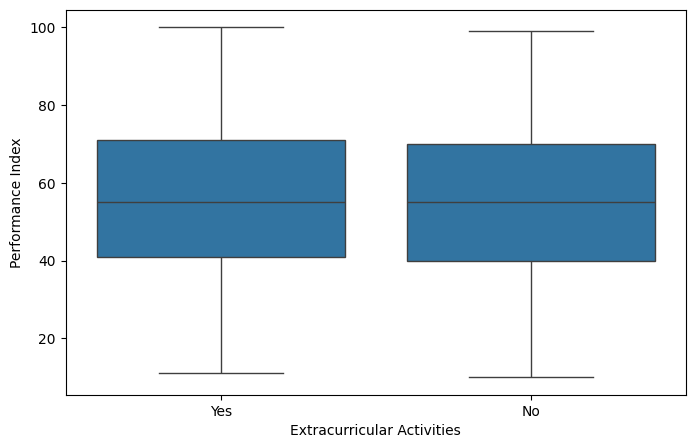

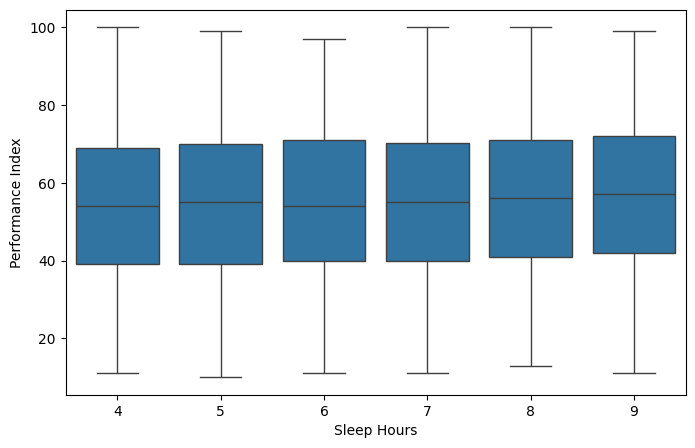

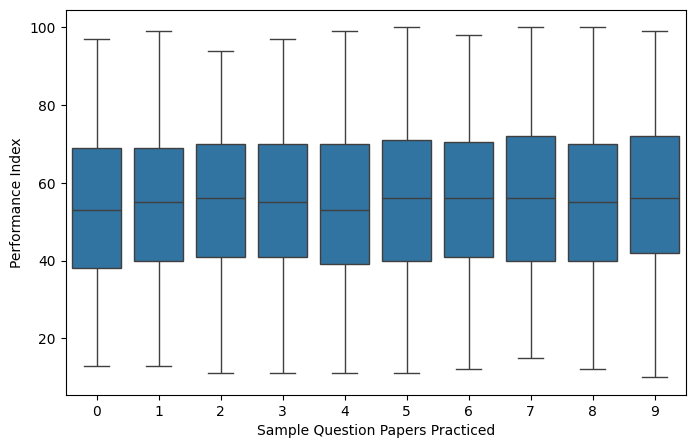

In [19]:
features = data.columns[:-1]
label = data.columns[-1]

for col in features:
    if col == "Previous Scores":
        continue
    fig = plt.figure(figsize = (8,5))
    ax = sns.boxplot(data, x = col, y = label)
    fig.show()

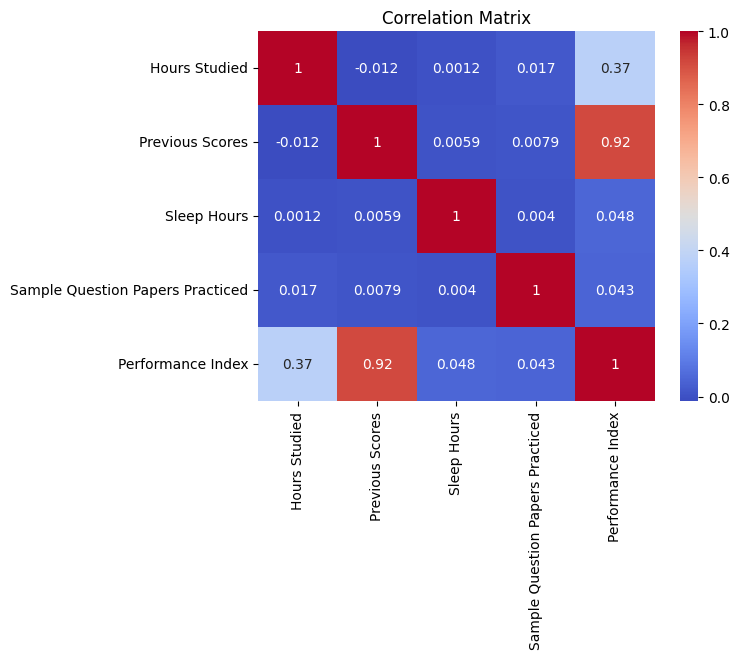

In [20]:
correlation_matrix = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### There's a lot of Strong Positive Relationships between Performance Index and Features

## Data Preprocessing

In [24]:
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Label Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Evaluating Results

In [29]:
# Predicting Test Set Results
y_pred = regressor.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [30]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})

,Actual Performance,Predicted Performance
6252,51.0,54.71
4684,20.0,22.62
1731,46.0,47.90
4742,28.0,31.29
4521,41.0,43.00
...,...,...
6412,45.0,46.89
8285,66.0,62.70
7853,16.0,16.79
1095,65.0,63.34


In [31]:
# Calculate the score of the model on the training data
regressor.score(X_train, y_train)

0.9886898790682355

In [32]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)


Mean Squared Error :  4.0826094
R Square :  0.9889833422235986


In [35]:
print(f'coefficients values are {regressor.coef_}')
print(f'y intecept is {regressor.intercept_}')

coefficients values are [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
y intecept is -33.92194621555611


### Therefore, the equation of our multiple linear regression model is:

Student Performance = 2.85×Hours Studied + 1.02×Previous Scores + 0.61×Extracurricular Activities + 0.48×Sleep Hours + 0.19×Sample Question Papers Practiced - 33.92